In [24]:
import numpy as np
import matplotlib.pyplot as plt

def straight_line_fit(x, y, x_err, y_err):
    # Weighted least squares fit
    weights = 1 / (y_err**2 + (x_err**2 * np.mean(np.diff(y)/np.diff(x)))**2)

    # Calculate weighted averages
    W = np.sum(weights)
    x_avg = np.sum(weights * x) / W
    y_avg = np.sum(weights * y) / W

    # Calculate slope and intercept using weighted least squares
    S_xx = np.sum(weights * (x - x_avg)**2)
    S_xy = np.sum(weights * (x - x_avg) * (y - y_avg))

    slope = S_xy / S_xx
    intercept = y_avg - slope * x_avg

    # Uncertainty in slope and intercept
    slope_err = np.sqrt(1 / S_xx)
    intercept_err = np.sqrt(np.sum(weights * (1 + (x - x_avg)**2 / S_xx)) / W)

    # Calculate x-intercept and its uncertainty
    x_intercept = -intercept / slope
    if intercept == 0:
        x_intercept_err = np.inf  # Infinite uncertainty if intercept is zero
    else:
        x_intercept_err = np.abs(x_intercept) * np.sqrt((slope_err / slope)**2 + (intercept_err / intercept)**2)

    return slope, intercept, slope_err, intercept_err, x_intercept, x_intercept_err


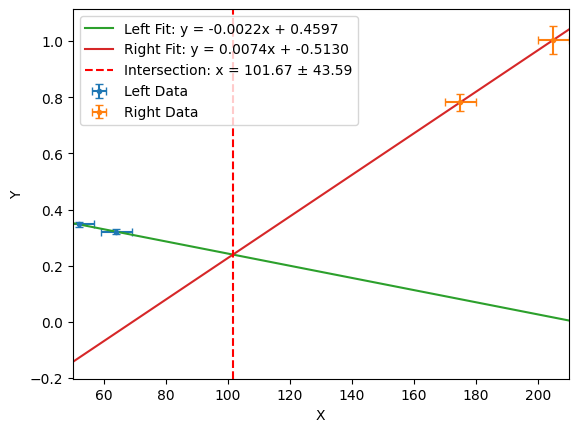

Left line: Slope = -0.0022 ± 0.0012, Intercept = 0.4597 ± 0.0621
Right line: Slope = 0.0074 ± 0.0019, Intercept = -0.5130 ± 0.3415
Intersection at x = 101.67 ± 43.59


In [26]:
# Convex lens - Part C

import numpy as np
import matplotlib.pyplot as plt

x_left = np.array([52, 64])
y_left = np.array([0.347, 0.321])
x_left_err = np.array([5, 5])
y_left_err = np.array([0.010, 0.010])

x_right = np.array([175, 205])
y_right = np.array([0.782, 1.004])
x_right_err = np.array([5, 5])
y_right_err = np.array([0.030, 0.050])

# Define a linear model
def linear_model(x, m, c):
    return m * x + c

# Fit left and right lines using simple linear algebra (y = mx + c)
# When only two points are present, the slope and intercept can be calculated directly
def linear_fit(x, y):
    m = (y[1] - y[0]) / (x[1] - x[0])
    c = y[0] - m * x[0]
    return m, c

# Fit left and right data
slope_left, intercept_left = linear_fit(x_left, y_left)
slope_right, intercept_right = linear_fit(x_right, y_right)

# Find the intersection point
x_intersection = (intercept_right - intercept_left) / (slope_left - slope_right)

# Estimate uncertainties by assuming constant errors in y
# Use the same uncertainty propagation method as before
slope_left_err = np.sqrt((y_left_err[1]**2 + y_left_err[0]**2) / (x_left[1] - x_left[0])**2)
slope_right_err = np.sqrt((y_right_err[1]**2 + y_right_err[0]**2) / (x_right[1] - x_right[0])**2)

intercept_left_err = np.sqrt(y_left_err[0]**2 + (slope_left_err * x_left[0])**2)
intercept_right_err = np.sqrt(y_right_err[0]**2 + (slope_right_err * x_right[0])**2)

# Calculate uncertainty in the intersection point
x_intersection_err = np.sqrt(
    (intercept_left_err**2 + intercept_right_err**2) / (slope_left - slope_right)**2 +
    ((intercept_right - intercept_left)**2 * (slope_left_err**2 + slope_right_err**2)) / (slope_left - slope_right)**4
)

# Extend the x-range for plotting both lines
x_extended = np.linspace(50, 210, 500)

# Plotting the data and the two fitted lines
plt.errorbar(x_left, y_left, xerr=x_left_err, yerr=y_left_err, fmt='.', label='Left Data', capsize=3)
plt.errorbar(x_right, y_right, xerr=x_right_err, yerr=y_right_err, fmt='.', label='Right Data', capsize=3)
plt.plot(x_extended, linear_model(x_extended, slope_left, intercept_left), label=f'Left Fit: y = {slope_left:.4f}x + {intercept_left:.4f}')
plt.plot(x_extended, linear_model(x_extended, slope_right, intercept_right), label=f'Right Fit: y = {slope_right:.4f}x + {intercept_right:.4f}')
plt.axvline(x_intersection, color='red', linestyle='--', label=f'Intersection: x = {x_intersection:.2f} ± {x_intersection_err:.2f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.xlim(50, 210)
plt.show()

# Print the results
print(f"Left line: Slope = {slope_left:.4f} ± {slope_left_err:.4f}, Intercept = {intercept_left:.4f} ± {intercept_left_err:.4f}")
print(f"Right line: Slope = {slope_right:.4f} ± {slope_right_err:.4f}, Intercept = {intercept_right:.4f} ± {intercept_right_err:.4f}")
print(f"Intersection at x = {x_intersection:.2f} ± {x_intersection_err:.2f}")


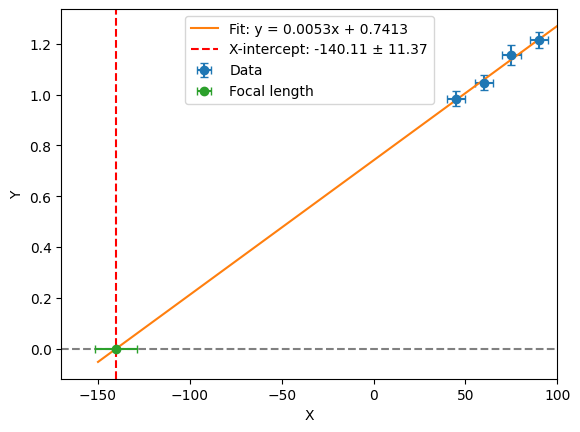

Slope: 0.0053 ± 0.0004
Intercept: 0.7413 ± 0.0265
X-intercept: -140.11 ± 11.37


In [31]:
# Concave lens - Part E

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

x = np.array([45, 60, 75, 90])
y = np.array([0.984, 1.047, 1.155, 1.215])
x_err = np.array([5, 5, 5, 5])
y_err = np.array([0.030, 0.030, 0.040, 0.030])

# Define a linear model for curve fitting
def linear_model(x, m, c):
    return m * x + c

# Perform the curve fit with errors in y
popt, pcov = curve_fit(linear_model, x, y, sigma=y_err)

# Extract the fitted parameters
slope, intercept = popt

# Find the x-intercept (set y = 0)
x_intercept = -intercept / slope

# Calculate uncertainty in slope and intercept from the covariance matrix
slope_err, intercept_err = np.sqrt(np.diag(pcov))

# Propagate the error to find the uncertainty in the x-intercept
x_intercept_err = np.sqrt((intercept_err / slope)**2 + (intercept * slope_err / slope**2)**2)

# Extend the x-range for the fit line to cover from -150 to 100
x_extended = np.linspace(-150, 100, 500)

# Plotting the data with the fit
plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', label='Data', capsize=3)
plt.plot(x_extended, linear_model(x_extended, *popt), label=f'Fit: y = {slope:.4f}x + {intercept:.4f}')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(x_intercept, color='red', linestyle='--', label=f'X-intercept: {x_intercept:.2f} ± {x_intercept_err:.2f}')
plt.errorbar(-140.11,0,xerr=11.37,fmt='o', label='Focal length', capsize=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Set the limits of the x-axis from -150 to 100
plt.xlim(-170, 100)

# Show the plot
plt.show()

# Print the results
print(f"Slope: {slope:.4f} ± {slope_err:.4f}")
print(f"Intercept: {intercept:.4f} ± {intercept_err:.4f}")
print(f"X-intercept: {x_intercept:.2f} ± {x_intercept_err:.2f}")
